In [1]:
#Librerias a implementar
import gdown
import zipfile
import os
import platform
from glob import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
from keras.models import Sequential
from keras.utils import to_categorical

import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Descargar el dataset
if os.access('10_food_classes_all_data', os.F_OK) is False:
    if os.access('10_food_classes_all_data.zip', os.F_OK) is False:
        url = 'https://drive.google.com/uc?id=1ltCRzJhGcmJITYq7o8XyrSAezXPYPzBX'
        output = '10_food_classes_all_data.zip'
        gdown.download(url, output, quiet=False)
    !unzip -q 10_food_classes_all_data.zip
else:
    print("El archivo ya se encuentra descargado")

Downloading...
From (original): https://drive.google.com/uc?id=1ltCRzJhGcmJITYq7o8XyrSAezXPYPzBX
From (redirected): https://drive.google.com/uc?id=1ltCRzJhGcmJITYq7o8XyrSAezXPYPzBX&confirm=t&uuid=b3a33d30-c00e-4853-9f37-51496677f826
To: /content/10_food_classes_all_data.zip
100%|██████████| 515M/515M [00:08<00:00, 59.9MB/s]


In [3]:
 train_dir = "./10_food_classes_all_data/train"
 test_dir = "./10_food_classes_all_data/test"

In [4]:
# Visualizar los directorios o tipos de comida
os.listdir(train_dir)

['hamburger',
 'chicken_curry',
 'ice_cream',
 'pizza',
 'steak',
 'ramen',
 'sushi',
 'grilled_salmon',
 'chicken_wings',
 'fried_rice']

In [5]:
# Se almacenan todas las carpetas en la variable "comidas"
comidas = os.listdir(train_dir)

# Cantidad de tipos de comida
len(comidas)

10

In [6]:
# Primera comida
comidas[0]

'hamburger'

In [7]:
# Tomar la primera comida
primera_comida = comidas[0]

# Patrón para buscar archivos .jpg en el directorio de la comida
files_pattern = os.path.join(train_dir, primera_comida, "*.jpg")

# Obtener archivos
files = glob(files_pattern)

# Mostrar lista de archivos
files

['./10_food_classes_all_data/train/hamburger/2671820.jpg',
 './10_food_classes_all_data/train/hamburger/3092142.jpg',
 './10_food_classes_all_data/train/hamburger/3452947.jpg',
 './10_food_classes_all_data/train/hamburger/1772548.jpg',
 './10_food_classes_all_data/train/hamburger/1007277.jpg',
 './10_food_classes_all_data/train/hamburger/3816451.jpg',
 './10_food_classes_all_data/train/hamburger/3336850.jpg',
 './10_food_classes_all_data/train/hamburger/806392.jpg',
 './10_food_classes_all_data/train/hamburger/1992893.jpg',
 './10_food_classes_all_data/train/hamburger/29455.jpg',
 './10_food_classes_all_data/train/hamburger/3741248.jpg',
 './10_food_classes_all_data/train/hamburger/637917.jpg',
 './10_food_classes_all_data/train/hamburger/1597001.jpg',
 './10_food_classes_all_data/train/hamburger/415105.jpg',
 './10_food_classes_all_data/train/hamburger/1838179.jpg',
 './10_food_classes_all_data/train/hamburger/825243.jpg',
 './10_food_classes_all_data/train/hamburger/215037.jpg',
 './

In [8]:
# Cantidad de archivos de la primera comida
len(files)

750

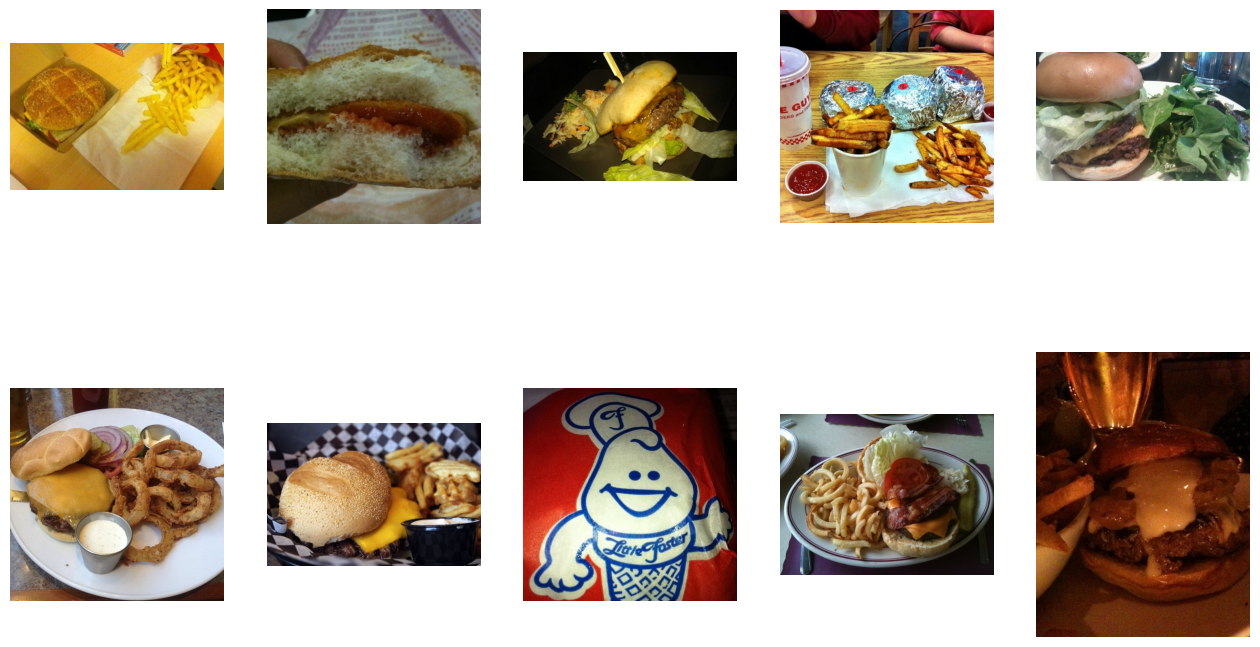

In [9]:
# Visualizar las 10 primeras imagenes de una comida
fig = plt.figure(figsize=(16,9))

for i in range(10):
  ax = fig.add_subplot(2, 5, i+1)
  ax.axis('off')

  img = mpimg.imread(files[i])

  plt.imshow(img)

plt.show()

In [10]:
# Visualizar las dimensiones de la primera imagen
img = mpimg.imread(files[0])
img.shape

(353, 512, 3)

In [11]:
# Visualizar como están representados los pixeles internos
print(img[85, 100:110, :])

[[191 121   7]
 [198 129   8]
 [210 142  17]
 [212 145  15]
 [212 143  14]
 [210 141  12]
 [207 136  10]
 [209 137  16]
 [211 139  21]
 [201 128  15]]


## Entrenar modelo CNN propio

In [12]:
# Crear un generador para entrenamiento
from keras.preprocessing.image import ImageDataGenerator

# Realizar un escalado de la imagen
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")

# Armar un diccionario
index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))

Found 7500 images belonging to 10 classes.


In [13]:
# Almacena las dimensiones y los canales de color
in_shape = (150, 150, 3)

In [14]:
# Representa los tipos de comida con los que se entrena la red
out_shape = 10

In [15]:
# Definir cuantas imagenes se consumiran por epoca para entrenamiento
steps_per_epoch_train = len(train_generator)

In [16]:
# Se arma modelo CNN propio con accuracy objetivo entre 0.25 y 0.4
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model1 = Sequential()

model1.add(Conv2D(filters=8, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=in_shape))
model1.add(MaxPooling2D(pool_size=2, strides=2))

model1.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2, strides=2))

model1.add(Flatten())

model1.add(Dense(units=64, activation='relu'))

model1.add(Dense(units=out_shape, activation='softmax'))

model1.compile(optimizer='Adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 21904)             0         
                                                                 
 dense (Dense)               (None, 64)                1

In [17]:
# Se entrena el modelo con el método fit
history1 = model1.fit(train_generator, steps_per_epoch=steps_per_epoch_train, epochs=2)

Epoch 1/2
375/375 [==============================] - 22s 47ms/step - loss: 2.1173 - accuracy: 0.2401
Epoch 2/2
375/375 [==============================] - 18s 49ms/step - loss: 1.8213 - accuracy: 0.3733


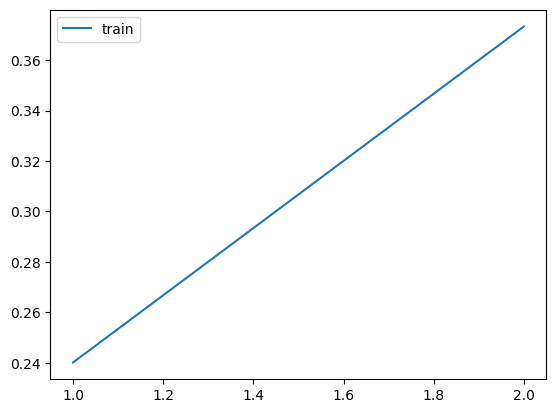

In [18]:
epoch_count = range(1, len(history1.history['accuracy']) + 1)

# Se accede al gráfico de línea para representar el 'accuracy'
sns.lineplot(x=epoch_count, y=history1.history['accuracy'], label='train')
plt.show()

In [19]:
# Crear un generador para test

# Realizar un escalado de la imagen
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode=None,
    shuffle=False)

# Predecir los datos a partir de los datos de test (test_generator)
y_hat_prob = model1.predict(test_generator)

# Resultado de la predicción de la primer imagen
# Muestra las probabilidades para cada comida
y_hat_prob[0]

Found 2500 images belonging to 10 classes.
250/250 [==============================] - 6s 21ms/step


array([0.08299382, 0.03432957, 0.08925381, 0.27194566, 0.05776888,
       0.03206942, 0.11258468, 0.19537935, 0.06567922, 0.05799552],
      dtype=float32)

In [20]:
# La probabilidad más alta es la predicción
y_hat = np.argmax(y_hat_prob, axis=1)

print("Índices con la probabilidad más alta en cada fila:", y_hat)

Índices con la probabilidad más alta en cada fila: [3 0 6 ... 7 2 7]


In [21]:
# Tipos de comida de prueba
test_generator.filenames

['chicken_curry/101833.jpg',
 'chicken_curry/10340.jpg',
 'chicken_curry/1035626.jpg',
 'chicken_curry/1048226.jpg',
 'chicken_curry/1075859.jpg',
 'chicken_curry/1076489.jpg',
 'chicken_curry/108559.jpg',
 'chicken_curry/1095245.jpg',
 'chicken_curry/1125163.jpg',
 'chicken_curry/1134602.jpg',
 'chicken_curry/1147753.jpg',
 'chicken_curry/115224.jpg',
 'chicken_curry/1165404.jpg',
 'chicken_curry/118944.jpg',
 'chicken_curry/1208906.jpg',
 'chicken_curry/1213873.jpg',
 'chicken_curry/1215399.jpg',
 'chicken_curry/1225331.jpg',
 'chicken_curry/1234505.jpg',
 'chicken_curry/1236329.jpg',
 'chicken_curry/1237705.jpg',
 'chicken_curry/1240973.jpg',
 'chicken_curry/1248926.jpg',
 'chicken_curry/1278457.jpg',
 'chicken_curry/1318090.jpg',
 'chicken_curry/1333857.jpg',
 'chicken_curry/1346888.jpg',
 'chicken_curry/1349731.jpg',
 'chicken_curry/1351520.jpg',
 'chicken_curry/1361171.jpg',
 'chicken_curry/137997.jpg',
 'chicken_curry/1382930.jpg',
 'chicken_curry/1394011.jpg',
 'chicken_curry/1

In [22]:
# Obtener solo los nombres de la comida
comidas_test = []

for file in test_generator.filenames:
  name_parts = file.split('/')

  image_name = name_parts[0]

  comidas_test.append(image_name)
comidas_test

['chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_

In [23]:
# Obtener el "y" verdadero
y_test = [train_generator.class_indices[tipo_comida] for tipo_comida in comidas_test]
y_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [24]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.3296

In [25]:
# Observar los resultados de las siguientes 10 imágenes de la predección.
batch_test = test_generator.next()
batch_test.shape

(10, 150, 150, 3)

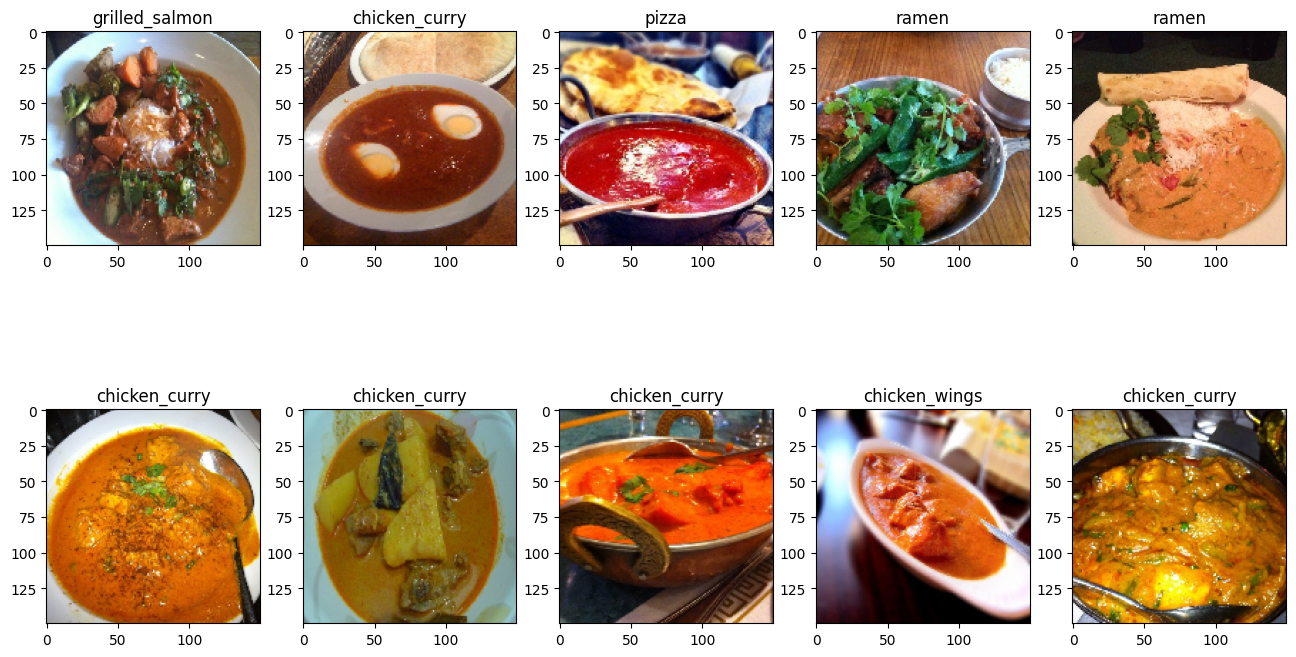

In [26]:
fig = plt.figure(figsize=(16,9))

for i in range(10):
  ax = fig.add_subplot(2, 5, i+1)

  ax.imshow(batch_test[i])

  numero_clase = y_hat[i]

  ax.set_title(index_to_classes[numero_clase])

plt.show()

## Entrenar modelo con transfer learning con la red VGG16

In [27]:
# Se vuelve a armar el generador de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")

index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))

Found 7500 images belonging to 10 classes.


In [28]:
# input shape
in_shape = (150, 150, 3)

# output shape
out_shape = 10

# Definir cuantas imagenes se consumiran por epoca para entrenamiento
steps_per_epoch_train = len(train_generator)

In [29]:
# Se importa VGG16 de la librería tensorflow.keras.applications
from tensorflow.keras.applications import VGG16

# Traemos el modelo VGG16
vgg_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=in_shape)

vgg_base.trainable=False

# Estructura de la red
vgg_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [30]:
# Se crea un nuevo modelo incluyendo la red vgg_base traida de VGG16
model_vgg = Sequential()

model_vgg.add(vgg_base)

model_vgg.add(Flatten())

model_vgg.add(Dense(units=64, activation='relu'))

model_vgg.add(Dense(units=out_shape, activation='softmax'))

model_vgg.compile(optimizer='Adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [31]:
# Se entrena el modelo con el método fit
history_vgg = model_vgg.fit(train_generator, steps_per_epoch=steps_per_epoch_train, epochs=2)

Epoch 1/2
375/375 [==============================] - 25s 57ms/step - loss: 1.5834 - accuracy: 0.4732
Epoch 2/2
375/375 [==============================] - 23s 61ms/step - loss: 1.0354 - accuracy: 0.6625


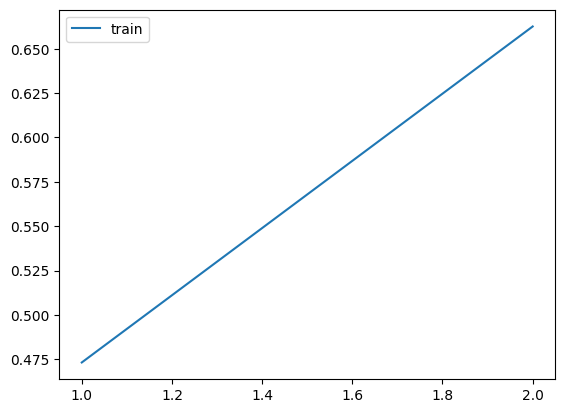

In [32]:
# Se accede al gráfico de línea para representar el 'accuracy'
epoch_count = range(1, len(history_vgg.history['accuracy']) + 1)

sns.lineplot(x=epoch_count, y=history_vgg.history['accuracy'], label='train')
plt.show()

In [33]:
# Estructura de la red neuronal con vgg_16
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                524352    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 15239690 (58.13 MB)
Trainable params: 525002 (2.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [34]:
# Predecir los datos
# Se arma un generador para test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode=None,
    shuffle=False)

# Predecir los datos a partir de los datos de test
y_hat_prob_vgg = model_vgg.predict(test_generator)

y_hat_prob_vgg[0]

Found 2500 images belonging to 10 classes.
250/250 [==============================] - 9s 28ms/step


array([6.8587214e-01, 4.4919912e-02, 4.1784178e-02, 3.8253244e-02,
       1.0429273e-03, 2.9965903e-04, 1.5199571e-03, 5.4618102e-03,
       1.7877099e-01, 2.0751650e-03], dtype=float32)

In [35]:
# La probabilidad más alta es la predicción.
y_hat_vgg = np.argmax(y_hat_prob_vgg, axis=1)
y_hat_vgg

array([0, 0, 6, ..., 9, 9, 9])

In [36]:
# Obtener los nombres de comida
comidas_test = []

for file in test_generator.filenames:
  name_parts = file.split('/')

  image_name = name_parts[0]

  comidas_test.append(image_name)
comidas_test

['chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_

In [37]:
# Obtener el "y" verdadero
y_test_vgg = [train_generator.class_indices[tipo_comida] for tipo_comida in comidas_test]
y_test_vgg

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [38]:
# Calcular la exactitud (accuracy)
accuracy_score(y_test_vgg, y_hat_vgg)

0.6232

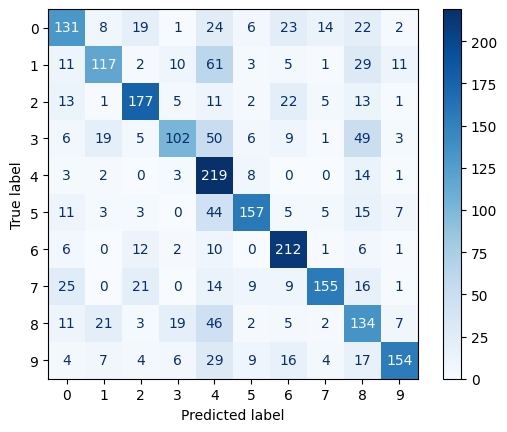

In [39]:
# Se utiliza la matriz de confusión para evaluar la precisión de la clasificación
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_vgg, y_hat_vgg)

cmd = ConfusionMatrixDisplay(cm)

cmd.plot(cmap=plt.cm.Blues)

plt.show()

## Utilizar el modelo con 5 imágenes de comida a elección: Hamburguesa, Helado, Sushi, Ramen y Pizza

In [40]:
# Descargar las 5 imágenes desde Google Drive
if os.access('comida_test_5', os.F_OK) is False:
    if os.access('comida_test_5.zip', os.F_OK) is False:
        url = 'https://drive.google.com/uc?id=1Mx3LWSuNwwounhJjihZiUGH2iK9-5SbM'
        output = 'comida_test_5.zip'
        gdown.download(url, output, quiet=False)
    !unzip -q comida_test_5.zip
else:
    print("El archivo ya se encuentra descargado")

Downloading...
From: https://drive.google.com/uc?id=1Mx3LWSuNwwounhJjihZiUGH2iK9-5SbM
To: /content/comida_test_5.zip
100%|██████████| 220k/220k [00:00<00:00, 86.3MB/s]


In [41]:
# Crear un generador para test de las 5 imagenes

# Realizar un escalado de la imagen
test_datagen_5 = ImageDataGenerator(rescale=1./255)

test_5_dir = "./comida_test_5"

test_generator_5 = test_datagen_5.flow_from_directory(
    directory=test_5_dir,
    target_size=(150, 150),
    batch_size=5,
    class_mode=None,
    shuffle=False)

Found 5 images belonging to 5 classes.


In [42]:
# Predecir los datos a partir de los datos de las 5 imagenes
y_hat_prob_5 = model_vgg.predict(test_generator_5)

# Resultado de la predicción de la primer imagen
# Muestra las probabilidades para cada comida
y_hat_prob_5[0]

1/1 [==============================] - 1s 1s/step


array([8.3811559e-05, 4.6793859e-05, 1.6332691e-06, 1.2426306e-03,
       9.9719006e-01, 8.3246658e-04, 4.6424818e-04, 5.5552385e-07,
       4.4001379e-05, 9.3782088e-05], dtype=float32)

In [43]:
# La probabilidad más alta es la predicción.
y_hat_5 = np.argmax(y_hat_prob_5, axis=1)
y_hat_5

array([4, 5, 6, 7, 9])

In [44]:
# Obtener solo los nombres de la comida
comidas_test_5 = []

for file in test_generator_5.filenames:
  name_parts = file.split('/')

  image_name = name_parts[0]

  comidas_test_5.append(image_name)
comidas_test_5

['hamburger', 'ice_cream', 'pizza', 'ramen', 'sushi']

In [45]:
# Obtener el "y" verdadero
y_test_5 = [train_generator.class_indices[comida] for comida in comidas_test_5]
y_test_5

[4, 5, 6, 7, 9]

In [46]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test_5, y_hat_5)

1.0

In [47]:
# Observar los resultados de las 5 imágenes de la predección.
batch_test_5 = test_generator_5.next()
batch_test_5.shape

(5, 150, 150, 3)

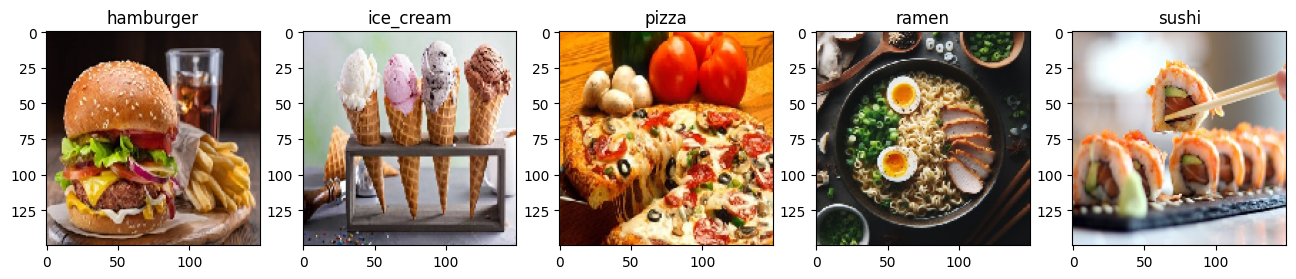

In [48]:
fig = plt.figure(figsize=(16,9))

for i in range(5):
  ax = fig.add_subplot(1, 5, i+1)

  ax.imshow(batch_test_5[i])

  numero_clase = y_hat_5[i]

  ax.set_title(index_to_classes[numero_clase])

plt.show()